In [ ]:
!pip install matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VNM.csv to VNM.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('VNM.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df


,Price
0,110654.0
1,111828.0
2,111124.0
3,110341.0
4,109324.0
...,...
1263,67800.0
1264,68000.0
1265,68400.0
1266,67800.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1268 non-null   float64
dtypes: float64(1)
memory usage: 10.0 KB


<h1> # Split the data into training, testing, and validation sets (7:2:1)


In [ ]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [ ]:
#  Create index for next 30 days
last_index = df.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']
next_30_days_features = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30 days
next_30_days_predictions = model.predict(next_30_days_features.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_df = pd.DataFrame(next_30_days_predictions, index=next_30_days_index, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1267         73376.83
1268         73376.83
1269         73376.83
1270         73376.83
1271         73376.83
1272         73376.83
1273         73376.83
1274         73376.83
1275         73376.83
1276         73376.83
1277         73376.83
1278         73376.83
1279         73376.83
1280         73376.83
1281         73376.83
1282         73376.83
1283         73376.83
1284         73376.83
1285         73376.83
1286         73376.83
1287         73376.83
1288         73376.83
1289         73376.83
1290         73376.83
1291         73376.83
1292         73376.83
1293         73376.83
1294         73376.83
1295         73376.83
1296         73376.83


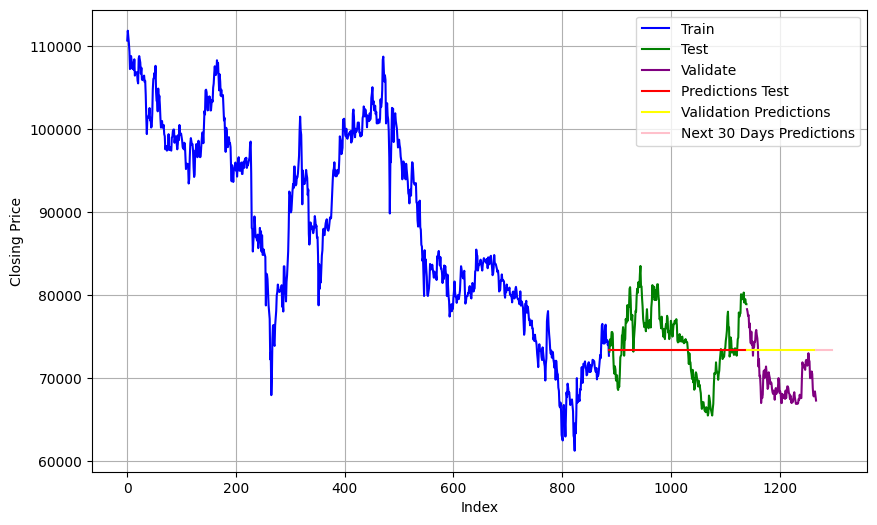

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_df.index, predicted_df['Predicted Close'], color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 4364.314981202664
Testing RMSE: 4224.421193457162
Validation MAE: 3973.133125000001
Testing MAE: 3512.2333992094855
Validation MAPE: 5.758826351633898
Testing MAPE: 4.721267357331628


<h1> # Split the data into training, testing, and validation sets (6:3:1)

In [ ]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [ ]:
#  Create index for next 30 days
last_index = df.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']
next_30_days_features = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30 days
next_30_days_predictions = model.predict(next_30_days_features.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_df = pd.DataFrame(next_30_days_predictions, index=next_30_days_index, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1267        73435.151
1268        73435.151
1269        73435.151
1270        73435.151
1271        73435.151
1272        73435.151
1273        73435.151
1274        73435.151
1275        73435.151
1276        73435.151
1277        73435.151
1278        73435.151
1279        73435.151
1280        73435.151
1281        73435.151
1282        73435.151
1283        73435.151
1284        73435.151
1285        73435.151
1286        73435.151
1287        73435.151
1288        73435.151
1289        73435.151
1290        73435.151
1291        73435.151
1292        73435.151
1293        73435.151
1294        73435.151
1295        73435.151
1296        73435.151


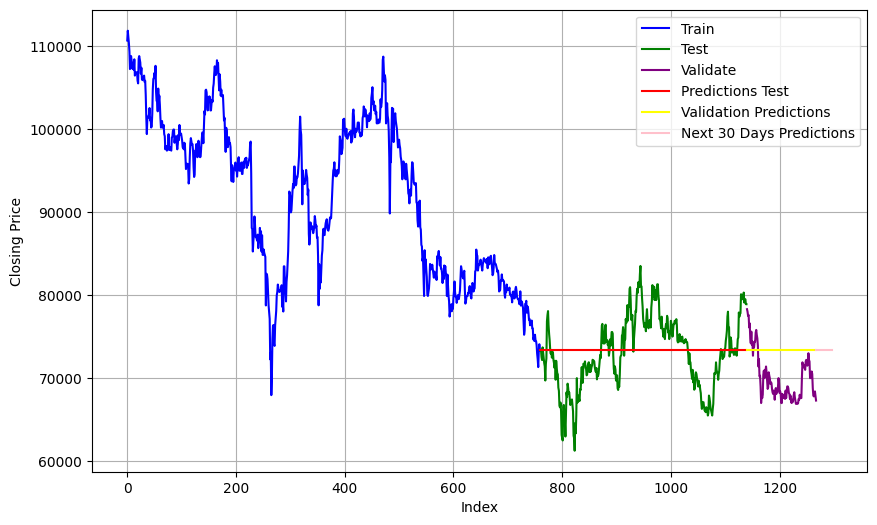

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_df.index, predicted_df['Predicted Close'], color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 4408.91284172477
Testing RMSE: 4341.494212718512
Validation MAE: 4013.2288124999586
Testing MAE: 3527.766110526312
Validation MAPE: 5.818047079234819
Testing MAPE: 4.900421117048245


<h1> # Split the data into training, testing, and validation sets (5:3:2)

In [ ]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [ ]:
#  Create index for next 30 days
last_index = df.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']
next_30_days_features = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30 days
next_30_days_predictions = model.predict(next_30_days_features.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_df = pd.DataFrame(next_30_days_predictions, index=next_30_days_index, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1267         79713.11
1268         79713.11
1269         79713.11
1270         79713.11
1271         79713.11
1272         79713.11
1273         79713.11
1274         79713.11
1275         79713.11
1276         79713.11
1277         79713.11
1278         79713.11
1279         79713.11
1280         79713.11
1281         79713.11
1282         79713.11
1283         79713.11
1284         79713.11
1285         79713.11
1286         79713.11
1287         79713.11
1288         79713.11
1289         79713.11
1290         79713.11
1291         79713.11
1292         79713.11
1293         79713.11
1294         79713.11
1295         79713.11
1296         79713.11


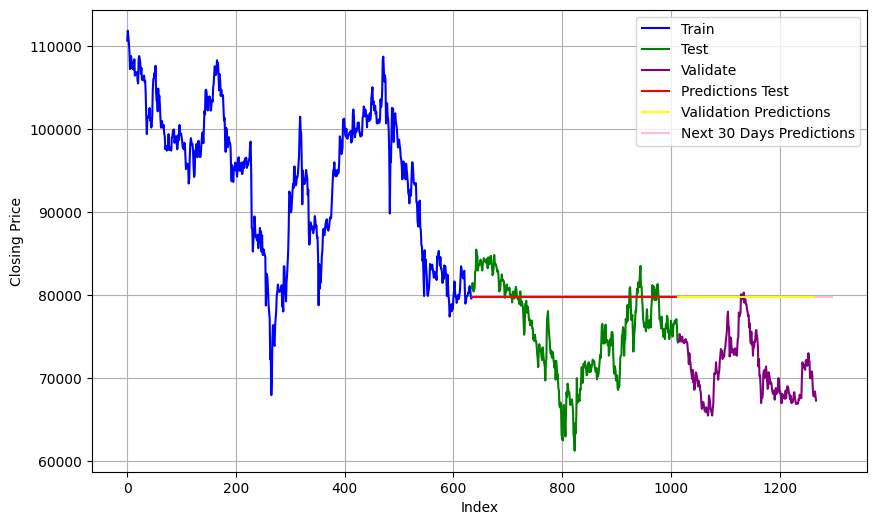

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_df.index, predicted_df['Predicted Close'], color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 9289.814246278944
Testing RMSE: 6559.75660824031
Validation MAE: 8588.68133858265
Testing MAE: 5221.5477368420925
Validation MAPE: 12.346944828279947
Testing MAPE: 7.261371450840687
